In [1]:
import pandas as pd
import numpy as np
import glob
import os
from scipy import signal
from scipy.stats import gaussian_kde

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

In [2]:
mpl.rcParams['axes.linewidth'] = 0.5 #set the value globally
mpl.rcParams['xtick.major.width'] = 0.5
mpl.rcParams['ytick.major.width'] = 0.5
mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams["lines.linewidth"] = 0.5

mpl.rc('font',**{'family':'sans-serif','serif':['Arial']})
mpl.rcParams['pdf.fonttype'] = 42

In [3]:
def GetAllUsableData(data, subset):
    df = pd.DataFrame([])
    for eachfile in data:
        _, tail = os.path.split(eachfile)
        name = tail[:-19]
        
        temp = pd.read_csv(eachfile)

        if np.any(subset.names == name):
            p1 = pd.Series(data = [name] * len(temp), name = 'name')
            p2 = pd.Series(data = [visit] * len(temp), name = 'visit')

            temp1 = pd.concat([temp, p1, p2], axis = 1)

            df = df.append(temp1)
            df = df[(df.radial_distance_normalized.notnull()) & (df.angle.notnull())]
    return(df)

In [4]:
def FitGaussainKde(radialDist, RRO):
        m1 = radialDist
        m2 = RRO
        xmin = m1.min()
        xmax = m1.max()
        ymin = m2.min()
        ymax = m2.max()
        X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

        values = np.vstack([m1, m2])
        kernel = gaussian_kde(values)
        
        return(X,Y,kernel)

In [5]:
def getFlowerCurvature(curve, x):
    
    r = 1
    R = 25
    L = 15
    y = L*(((x - r)/R) ** np.exp(curve))
    return y

## draw the radial and angle distribution together

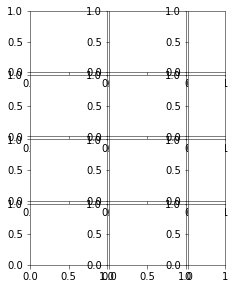

In [9]:
## draw Fig3 in its entirity

shapes = ['c-1', 'c-2','c-3', 'c-10']
w = 3.5 # half width 
h = 4.67 # square-ish figure

# gridspec inside gridspec
f = plt.figure(figsize = (w,h))

gs0 = plt.GridSpec(4, 5, figure=f, hspace = 0.05, wspace=0.05)

ax00 = f.add_subplot(gs0[0,0:2])
ax10 = f.add_subplot(gs0[1,0:2])
ax20 = f.add_subplot(gs0[2,0:2])
ax30 = f.add_subplot(gs0[3,0:2])

ax01 = f.add_subplot(gs0[0,2:4])
ax11 = f.add_subplot(gs0[1,2:4])
ax21 = f.add_subplot(gs0[2,2:4])
ax31 = f.add_subplot(gs0[3,2:4])

ax02 = f.add_subplot(gs0[0,4])
ax12 = f.add_subplot(gs0[1,4])
ax22 = f.add_subplot(gs0[2,4])
ax32 = f.add_subplot(gs0[3,4])

# ax00 = f.add_subplot(gs0[0,0:2])
# ax10 = f.add_subplot(gs0[1,0:2], sharex = ax00, sharey = ax00)
# ax20 = f.add_subplot(gs0[2,0:2], sharex = ax00, sharey = ax00)
# ax30 = f.add_subplot(gs0[3,0:2], sharex = ax00, sharey = ax00)

# ax01 = f.add_subplot(gs0[0,2:4], sharex = ax00, sharey = ax00)
# ax11 = f.add_subplot(gs0[1,2:4], sharex = ax00, sharey = ax10)
# ax21 = f.add_subplot(gs0[2,2:4], sharex = ax00, sharey = ax20)
# ax31 = f.add_subplot(gs0[3,2:4], sharex = ax00, sharey = ax30)

# ax02 = f.add_subplot(gs0[0,4],sharey = ax00)
# ax12 = f.add_subplot(gs0[1,4],sharey = ax10)
# ax22 = f.add_subplot(gs0[2,4],sharey = ax20)
# ax32 = f.add_subplot(gs0[3,4],sharey = ax30)

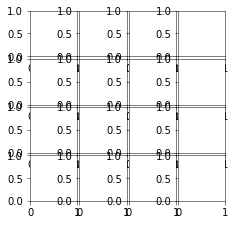

In [84]:
## draw Fig3 in its entirity

shapes = ['c-1', 'c-2','c-3', 'c-10']
w = 3.5 # half width 
h = (3.5/4)*4 # square-ish figure

# gridspec inside gridspec
f = plt.figure(figsize = (w,h))

gs0 = plt.GridSpec(4, 4, figure=f, hspace = 0.05, wspace=0.05)

axf0 = f.add_subplot(gs0[0,0])
axf1 = f.add_subplot(gs0[0,1])
axf2 = f.add_subplot(gs0[0,2])
axf3 = f.add_subplot(gs0[0,3])

axv00 = f.add_subplot(gs0[1,0])
axv01 = f.add_subplot(gs0[1,1])
axv02 = f.add_subplot(gs0[1,2])
axv03 = f.add_subplot(gs0[1,3])

axv10 = f.add_subplot(gs0[2,0])
axv11 = f.add_subplot(gs0[2,1])
axv12 = f.add_subplot(gs0[2,2])
axv13 = f.add_subplot(gs0[2,3])

axv20 = f.add_subplot(gs0[3,0])
axv21 = f.add_subplot(gs0[3,1])
axv22 = f.add_subplot(gs0[3,2])
axv23 = f.add_subplot(gs0[3,3])

In [85]:
first = [axv00, axv01, axv02, axv03]
later7 = [axv10, axv11, axv12, axv13]
later = [axv20, axv21, axv22, axv23]
profiles = [axf0, axf1, axf2, axf3]

In [86]:
shapes = ['c-1_', 'c-2_', 'c-3_', 'c-10_']

visitnum = ['FirstVisit/','Later7thVisit/' , 'LaterVisit/']

for visit, axes in zip(visitnum, [first, later7, later]):
    data_path = os.path.join(r"../dataFolders/PaperPipelineOutput/RadiusAndAngle_v2/", visit)
    data = glob.glob(data_path +'*.csv')
    
    videoselection = pd.read_csv(os.path.join(r"../dataFolders/PaperPipelineOutput/FilteredTracks_v2/",visit) + 
                                          "AllVideoNames.csv")
    subset = videoselection.loc[videoselection.AutomatatedTracking == 'TRUE', :]
    
    df = GetAllUsableData(data, subset)
    
    # remove anything greater than 1.5 and less than 0.1
    df = df[(df.radial_distance_normalized < 1.5)
        & (df.radial_distance_normalized > 0.06)]

    for i, shape in enumerate(shapes):
        r = df.loc[(df.name.str.contains(shape)) & 
                             (df.visit == visit), 'radial_distance_normalized']
        angle = df.loc[(df.name.str.contains(shape)) & 
                             (df.visit == visit), 'angle']

#         ax[i].hexbin(r, angle)
#         ax[i].set_title(shape + 'radial Dist vs angle')

        # perform a kernel density estimation
        X,Y,kernel = FitGaussainKde(r, angle)
        #reset the kernel bandwidth to make it smaller
        kernel.set_bandwidth(bw_method=kernel.factor / 1.5)
        
        positions = np.vstack([X.ravel(), Y.ravel()])
        Z = np.reshape(kernel(positions).T, X.shape)

        tt = axes[i].pcolormesh(X, Y, Z.reshape(X.shape), cmap=plt.cm.BuGn_r)
        
#         # get colorbar
        
#         cbar = fig.colorbar(tt, ax=ax0)
        axes[i].contour(X, Y, Z.reshape(X.shape), levels = 4, linewidth = 0.5)
        axes[i].axvline(x = 1.0, ls = '--', linewidth = 0.5, color = 'fuchsia')
        axes[i].set_xlim(0, 1.5)
        i+=1

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:41: UserWarning: The following kwargs were not used by contour: 'linewidth'


In [87]:
curvatures = [-1, -2, -3, -10]
x = np.arange(0, 25, 0.1)

for i, c in enumerate(curvatures):
    y = getFlowerCurvature(c, x)
    profiles[i].plot(x/np.max(x), y, color = 'k', linewidth = 1.0)
    profiles[i].set_ylim(0, 16)
    profiles[i].set_xlim(0,1.5)

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  


In [88]:
# accesorize

for axes in first + later7 + later:
    axes.spines['left'].set_visible(True)
    axes.spines['bottom'].set_visible(True)
    axes.spines['right'].set_visible(False)
    axes.spines['top'].set_visible(False)
    
    axes.spines['left'].set_smart_bounds(True)
    axes.spines['bottom'].set_smart_bounds(True)

# for axes in [ax30, ax31]:
for axes in [first[0], later7[0], later[0]]:
    axes.set_yticks([0, 45, 90])
    axes.set_yticklabels([0, 45, 90])
    
for axes in later:
    axes.set_xticks([0, 1])
    axes.set_xticklabels([0, 1])
    
for axes in first + later7 + profiles:
    axes.set_xticks([])
    
for axes in first[1:] + later7[1:] + later[1:] + profiles[1:]: 
    axes.set_yticks([])

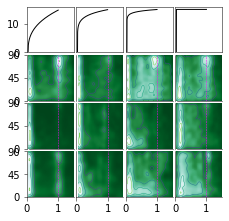

In [89]:
f

In [90]:
f.savefig(r"../dataFolders/PaperPipelineOutput/Figures/v2/Paper/Figure4-angleVsRRO_v0-3.pdf")

## plot the raw data for the same graph as a separate figure

In [91]:
for axes in first + later7 + later:
    axes.clear()

In [92]:
for visit, axes in zip(visitnum, [first, later7, later]):
    data_path = os.path.join(r"../dataFolders/PaperPipelineOutput/RadiusAndAngle_v2/", visit)
    data = glob.glob(data_path +'*.csv')
    
    videoselection = pd.read_csv(os.path.join(r"../dataFolders/PaperPipelineOutput/FilteredTracks_v2/",visit) + 
                                          "AllVideoNames.csv")
    subset = videoselection.loc[videoselection.AutomatatedTracking == 'TRUE', :]
    
    df = GetAllUsableData(data, subset)
    
    # remove anything greater than 1.5 and less than 0.1
    df = df[(df.radial_distance_normalized < 1.5)
        & (df.radial_distance_normalized > 0.06) ]

    for i, shape in enumerate(shapes):
        r = df.loc[(df.name.str.contains(shape)) & 
                             (df.visit == visit), 'radial_distance_normalized']
        angle = df.loc[(df.name.str.contains(shape)) & 
                             (df.visit == visit), 'angle']

        axes[i].hexbin(r, angle)
        axes[i].axvline(x = 1.0, ls = '--', linewidth = 0.5, color = 'silver')
        axes[i].set_xlim(0, 1.5)
        i+=1

In [93]:
# accesorize

for axes in first + later7 + later:
    axes.spines['left'].set_visible(True)
    axes.spines['bottom'].set_visible(True)
    axes.spines['right'].set_visible(False)
    axes.spines['top'].set_visible(False)
    
    axes.spines['left'].set_smart_bounds(True)
    axes.spines['bottom'].set_smart_bounds(True)

# for axes in [ax30, ax31]:
for axes in [first[0], later7[0], later[0]]:
    axes.set_yticks([0, 45, 90])
    axes.set_yticklabels([0, 45, 90])
    
for axes in later:
    axes.set_xticks([0, 1])
    axes.set_xticklabels([0, 1])
    
for axes in first + later7 + profiles:
    axes.set_xticks([])
    
for axes in first[1:] + later7[1:] + later[1:] + profiles[1:]: 
    axes.set_yticks([])

In [131]:
# # accesorize

# for axes in first + later:
#     axes.spines['left'].set_visible(True)
#     axes.spines['bottom'].set_visible(True)
#     axes.spines['right'].set_visible(False)
#     axes.spines['top'].set_visible(False)
    
#     axes.spines['left'].set_smart_bounds(True)
#     axes.spines['bottom'].set_smart_bounds(True)

# for axes in [ax30, ax31]:
#     axes.set_xticks([0, 45, 90])
#     axes.set_xticklabels([0, 45, 90])
    
# for axes in first:
#     axes.set_yticks([0, 1])
#     axes.set_yticklabels([0, 1])
    
# for axes in first[:-1] + later[:-1] + profiles[:-1]:
#     axes.set_xticks([])
    
# for axes in later + profiles: 
#     axes.set_yticks([])

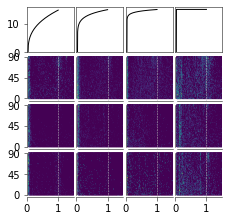

In [94]:
f

In [95]:
f.savefig(r"../dataFolders/PaperPipelineOutput/Figures/v2/Paper/Figure4-angleVsRRO_rawDatav0-3.pdf")